In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

In [19]:
df=pd.read_csv('/content/Paris_house_price.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1.0,4313.0,9005,956.0,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0.0,3653.0,2436,128.0,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0.0,2937.0,8852,135.0,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1.0,659.0,7141,359.0,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0.0,8435.0,2429,292.0,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1.0,9311.0,1698,218.0,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1.0,9061.0,1742,230.0,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1.0,8304.0,7730,345.0,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1.0,2590.0,6174,339.0,1,4,5905107.0


In [20]:
df.isna().sum()

,0
squareMeters,0
numberOfRooms,0
hasYard,0
hasPool,0
floors,0
cityCode,0
cityPartRange,0
numPrevOwners,0
made,0
isNewBuilt,0


In [21]:
df['hasStormProtector']=df['hasStormProtector'].fillna(df['hasStormProtector'].mode()[0])
df['garage']=df['garage'].fillna(df['garage'].median())
df['basement']=df['basement'].fillna(df['basement'].median())

In [22]:
df.dtypes

,0
squareMeters,int64
numberOfRooms,int64
hasYard,int64
hasPool,int64
floors,int64
cityCode,int64
cityPartRange,int64
numPrevOwners,int64
made,int64
isNewBuilt,int64


In [23]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()
lr=LinearRegression()
svc=SVR(kernel='linear')


models=[knn,dt,rf,ada,gb,xgb,lr,svc]
for model in models:
  print('-'*35,model,'-'*35)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('R2_score:',r2_score(y_test,y_pred))
  print('MSE',mean_squared_error(y_test,y_pred))
  print('MAE',mean_absolute_error(y_test,y_pred))
  print('RMSE',root_mean_squared_error(y_test,y_pred))

----------------------------------- KNeighborsRegressor() -----------------------------------
R2_score: 0.704432348242483
MSE 2421187395173.488
MAE 1277611.1677866667
RMSE 1556016.515070932
----------------------------------- DecisionTreeRegressor() -----------------------------------
R2_score: 0.9999961968573576
MSE 31154021.670200013
MAE 4392.632066666668
RMSE 5581.578779359834
----------------------------------- RandomForestRegressor() -----------------------------------
R2_score: 0.9999981050883394
MSE 15522457.211422766
MAE 3173.554534666708
RMSE 3939.8549733997525
----------------------------------- AdaBoostRegressor() -----------------------------------
R2_score: 0.9848024992444112
MSE 124492640005.67416
MAE 304862.1392196923
RMSE 352835.1456497413
----------------------------------- GradientBoostingRegressor() -----------------------------------
R2_score: 0.9999478189397754
MSE 427449095.09390885
MAE 15678.793462718817
RMSE 20674.8420814745
----------------------------------- X

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

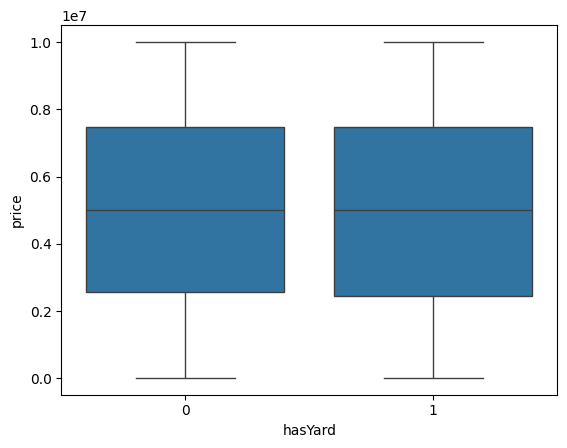

In [15]:
sns.boxplot(x='hasYard', y='price', data=df)
plt.show()

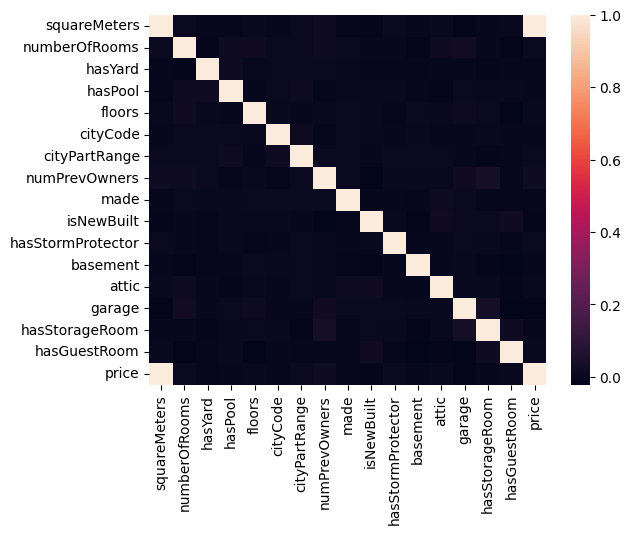

In [16]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

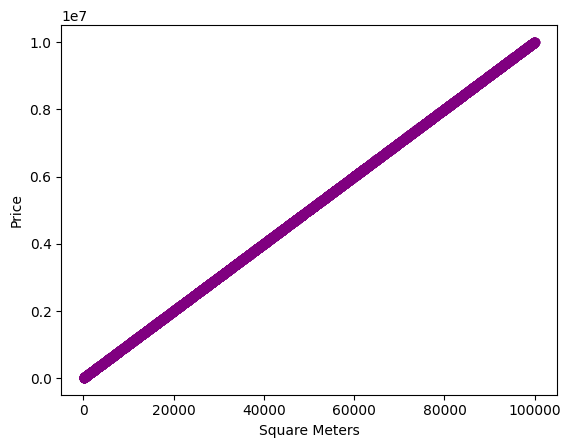

In [24]:
plt.scatter(df['squareMeters'], df['price'],color='purple')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.show()

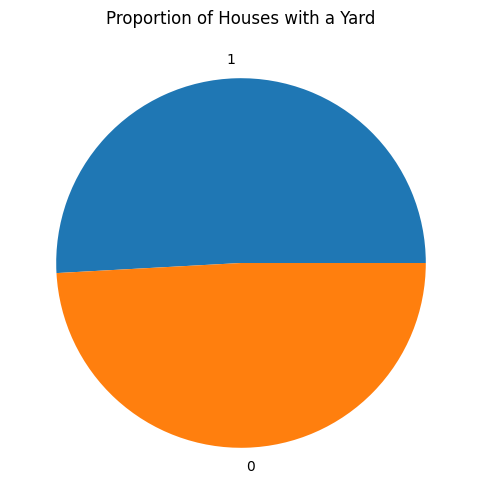

In [25]:

has_yard_counts = df['hasYard'].value_counts()
labels = has_yard_counts.index.tolist()
sizes = has_yard_counts.values.tolist()
plt.figure(figsize=(6, 6))   #figure size
plt.pie(sizes, labels=labels)
plt.title('Proportion of Houses with a Yard')
plt.show()

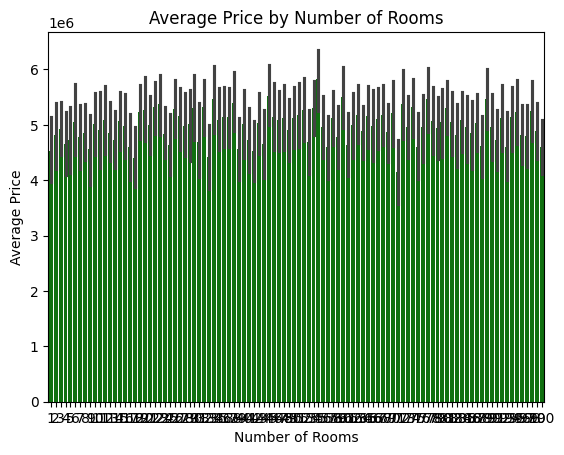

In [26]:
sns.barplot(x='numberOfRooms', y='price', data=df,color='green')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Rooms')
plt.show()
